# **CSC8637  Coursework Task 1**

## **Google Drive Access**

First we want to gain access to the dataset that we are going to use for this implementation. I am going to use Google Drive in order to retreive the saved dataset.

In [ ]:
# Connect to Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Setting up the model**

After the connection to google drive , I am going to clone the official repository of the CycleGAN model in order to work with it.

In [ ]:
# Clone the repository
!git clone https://github.com/junyanz/pytorch-CycleGAN-and-pix2pix.git
%cd pytorch-CycleGAN-and-pix2pix

Cloning into 'pytorch-CycleGAN-and-pix2pix'...
remote: Enumerating objects: 2513, done.
remote: Total 2513 (delta 0), reused 0 (delta 0), pack-reused 2513
Receiving objects: 100% (2513/2513), 8.20 MiB | 10.41 MiB/s, done.
Resolving deltas: 100% (1575/1575), done.
/content/pytorch-CycleGAN-and-pix2pix


Now it is time to install all the dependancies of the repository in order to prevent any errors and include all the required libraries.

In [ ]:
# Install dependencies
!pip install -r requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 24.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 39.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 195.4/195.4 kB 28.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.5/258.5 kB 35.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 9.5 MB/s eta 0:00:00
  Created wheel for visdom: filename=visdom-0.2.4-py3-none-any.whl size=1408194 sha256=74210b2e796b0e43e5d6871c4dc2baba7a83a63f65a24755195ad404087e2399
  Stored in directory: /root/.cache/pip/wheels/42/29/49/5bed207bac4578e4d2c0c5fc0226bfd33a7e2953ea56356855
Successfully built visdom


Now I am going to create a link in order to use it as the default space of my dataset.
Inside the dataset folder there are the following folders:

1. trainA - Which contains the images of humans.
2. trainB - Which contains the images of cats and dogs.
3. testA - Which contains the images of the humans that will be tested/transformed.
4. testB - Which contains the images of the cats/dogs that will be tested/transformed.

In [ ]:
# Prepare the dataset
!ln -s /content/drive/MyDrive/Colab/dataset ./dataset

## **Training the model**

Training the model is the most important step in this process. Starting by define which model are going to be used, we need the basic model cyclegan and not a pretrained one and thus I am using the parameter --model cycle_gan to change that. Then in order to change the number of epochs that the model will be trained with I have added the parameter --n_epochs and --n_epochs_decay in order to change the default number of epochs during training. And also the batch size have been changed during the training process, the default was 1 but I will use 4.

In [ ]:
# Train the model
!python train.py --dataroot ./dataset --name part_1 --model cycle_gan --n_epochs 25 --n_epochs_decay 5 --batch_size 4 --display_id -1

----------------- Options ---------------
               batch_size: 4                             	[default: 1]
                    beta1: 0.5                           
          checkpoints_dir: ./checkpoints                 
           continue_train: False                         
                crop_size: 256                           
                 dataroot: ./dataset                     	[default: None]
             dataset_mode: unaligned                     
                direction: AtoB                          
              display_env: main                          
             display_freq: 400                           
               display_id: -1                            	[default: 1]
            display_ncols: 4                             
             display_port: 8097                          
           display_server: http://localhost              
          display_winsize: 256                           
                    epoch: latest             

## **Preprocess the given images**

In order to ensure the size of the given images to be tested we have to preprocess them first.

In [ ]:
from PIL import Image
import os

def resize_images_in_directory(source_directory, target_directory, size=(64, 64)):
    # Ensure target directory exists
    if not os.path.exists(target_directory):
        os.makedirs(target_directory)

    # Iterate over all files in the source directory
    for filename in os.listdir(source_directory):
        if filename.endswith('.jpg') or filename.endswith('.png'):
            # Open the image
            img_path = os.path.join(source_directory, filename)
            with Image.open(img_path) as img:
                # Resize the image
                img = img.resize(size, Image.ANTIALIAS)

                # Save it to the target directory
                target_path = os.path.join(target_directory, filename)
                img.save(target_path)

# Set your source and target directories
source_directory = '/content/drive/MyDrive/Colab/dataset/testA/'
target_directory = '/content/drive/MyDrive/Colab/dataset/testA/testA_resized/'

# source_directory = '/content/drive/MyDrive/Colab/dataset/testB/'
# target_directory = '/content/drive/MyDrive/Colab/dataset/testB/testB_resized/'

# Resize the images
resize_images_in_directory(source_directory, target_directory)

## **Testing the model**

First we are going to move the folder part_1 to the colab environment which contains the trained models for our task.
In order to test the model we need make some adjustments in the below command and to rename the provided models in order to work. For each case we need to change the parameters of the command accordingly.

To transform human to cat/dog:
- Move the images you want to transform to the folder /content/drive/MyDrive/Colab/dataset/testA
- Rename the model "latest_net_G_A.pth" to "latest_net_G.pth"
- --direction AtoB
- --dataroot /content/drive/MyDrive/Colab/dataset/testA/testA_resized


To transform cat/dog to human:

- Move the images you want to transform to the folder /content/drive/MyDrive/Colab/dataset/testB
- Rename the model "latest_net_G_B.pth" to "latest_net_G.pth"
- --direction BtoA
- --dataroot /content/drive/MyDrive/Colab/dataset/testB/testB_resized

In [ ]:
# Test the model
!python test.py --dataroot "/content/drive/MyDrive/Colab/dataset/testA/testA_resized" --name part_1 --model test --no_dropout --checkpoints_dir "/content" --direction AtoB

----------------- Options ---------------
             aspect_ratio: 1.0                           
               batch_size: 1                             
          checkpoints_dir: /content                      	[default: ./checkpoints]
                crop_size: 256                           
                 dataroot: /content/drive/MyDrive/Colab/dataset/testA	[default: None]
             dataset_mode: single                        
                direction: AtoB                          
          display_winsize: 256                           
                    epoch: latest                        
                     eval: False                         
                  gpu_ids: 0                             
                init_gain: 0.02                          
                init_type: normal                        
                 input_nc: 3                             
                  isTrain: False                         	[default: None]
                loa

## **Visualise the results**

And here is the last part where we are visualising the results of the transformed images.

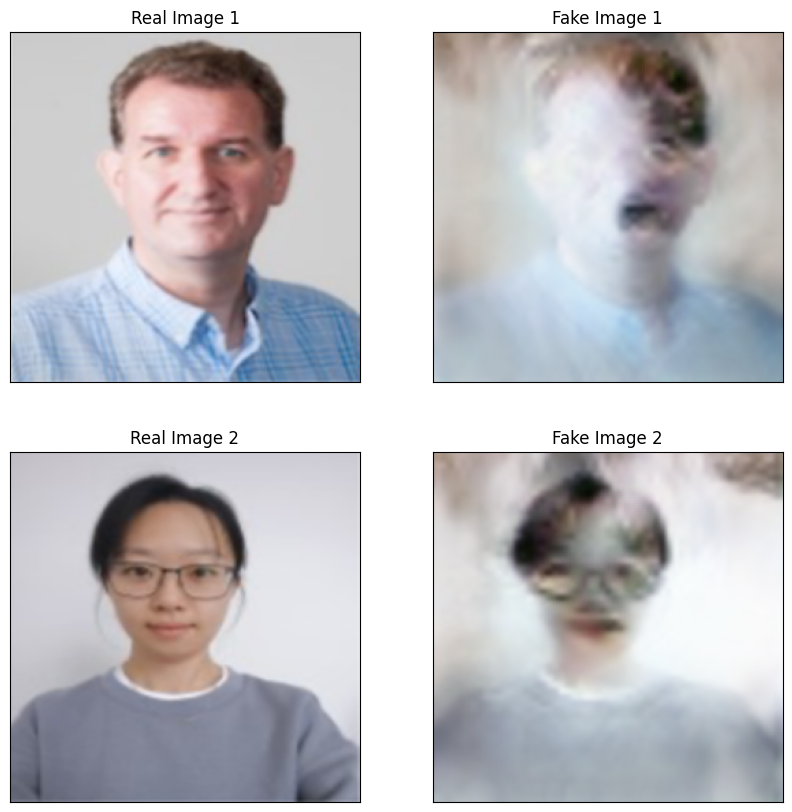

In [ ]:
import os
from PIL import Image
import matplotlib.pyplot as plt

# Directory where the images are stored
results_dir = '/content/pytorch-CycleGAN-and-pix2pix/results/part_1/test_latest/images'

# Get all image file names
image_files = sorted([f for f in os.listdir(results_dir) if f.endswith('.png') or f.endswith('.jpg')])

# Separate real and fake images
real_images = [f for f in image_files if '_real.' in f]
fake_images = [f for f in image_files if '_fake.' in f]

# Assuming the number of real images and fake images are the same
num_pairs = len(real_images)

# Create a figure with subplots
plt.figure(figsize=(10, num_pairs * 5))

# Loop through the pairs and display them
for i in range(num_pairs):
    # File paths for the real and fake images
    real_image_file = os.path.join(results_dir, real_images[i])
    fake_image_file = os.path.join(results_dir, fake_images[i])

    # Open the real image file
    real_img = Image.open(real_image_file)
    # Open the fake image file
    fake_img = Image.open(fake_image_file)

    # Display the real image
    plt.subplot(num_pairs, 2, 2 * i + 1)
    plt.imshow(real_img)
    plt.xticks([]), plt.yticks([])
    plt.title(f"Real Image {i + 1}")

    # Display the fake image
    plt.subplot(num_pairs, 2, 2 * i + 2)
    plt.imshow(fake_img)
    plt.xticks([]), plt.yticks([])
    plt.title(f"Fake Image {i + 1}")

# Show the plot
plt.show()
